In [4]:
#Read valeurs
import pandas as pd

df = pd.read_csv('historical_automobile_sales.csv')
df

,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,8/31/2023,2023,Aug,0,103.36,0.25,27852.993,1793,6,57.169,0.764155,2.6,1579.6,Executivecar,New York
524,9/30/2023,2023,Sep,0,101.55,0.07,21183.704,1028,5,59.315,0.036180,2.5,1123.4,Smallfamiliycar,California
525,10/31/2023,2023,Oct,0,124.66,0.12,15975.589,1148,9,19.472,-2.046169,2.5,1685.9,Sports,California
526,11/30/2023,2023,Nov,0,97.09,0.25,16862.288,4850,5,27.904,0.302179,2.9,2124.6,Smallfamiliycar,Georgia


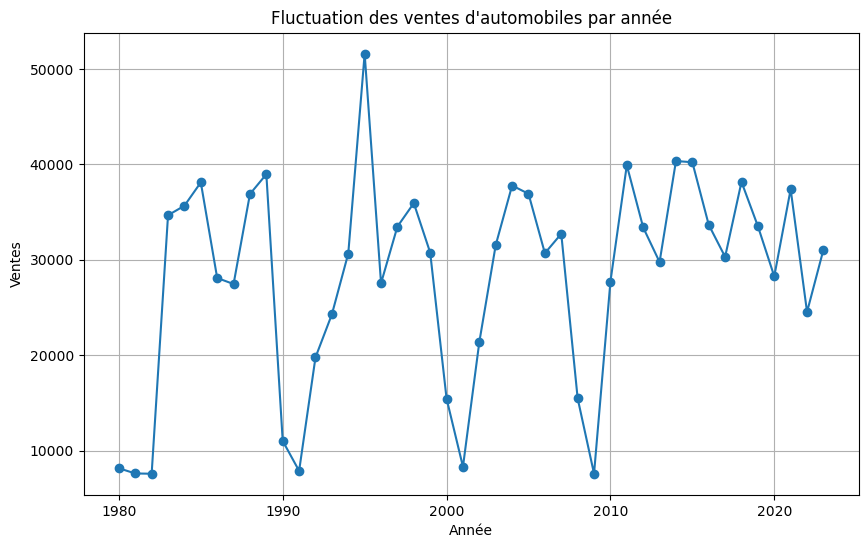

In [6]:
import matplotlib.pyplot as plt

sales_by_year = df.groupby('Year')['Automobile_Sales'].sum()

sales_by_year.plot(kind='line', figsize=(10, 6), marker='o', linestyle='-')

plt.title('Fluctuation des ventes d\'automobiles par année')
plt.xlabel('Année')
plt.ylabel('Ventes')
plt.grid(True)
# Afficher le graphique
plt.show()


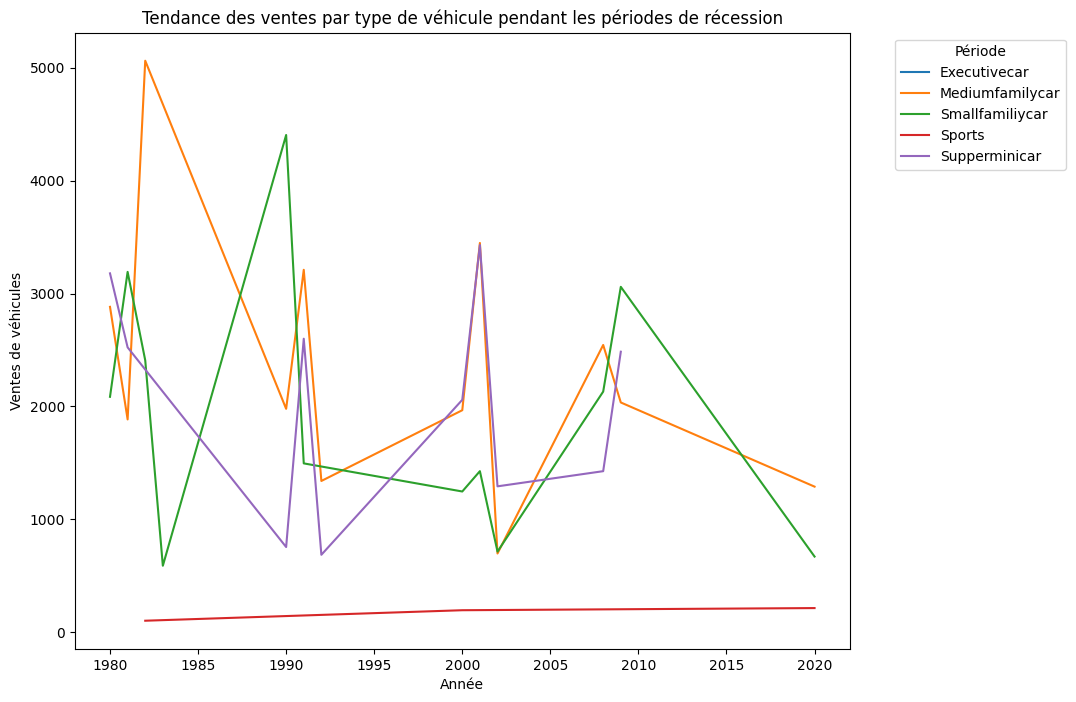

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
recession_data = df[df['Recession'] == 1]
plt.figure(figsize=(10, 8))
df_Mline = recession_data.groupby(['Year','Vehicle_Type'], as_index=False)['Automobile_Sales'].sum()
df_Mline.set_index('Year', inplace=True)
df_Mline = df_Mline.groupby(['Vehicle_Type'])['Automobile_Sales']
df_Mline.plot(kind='line')
plt.xlabel('Année')
plt.ylabel('Ventes de véhicules')
plt.title('Tendance des ventes par type de véhicule pendant les périodes de récession')
plt.legend(title='Période', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

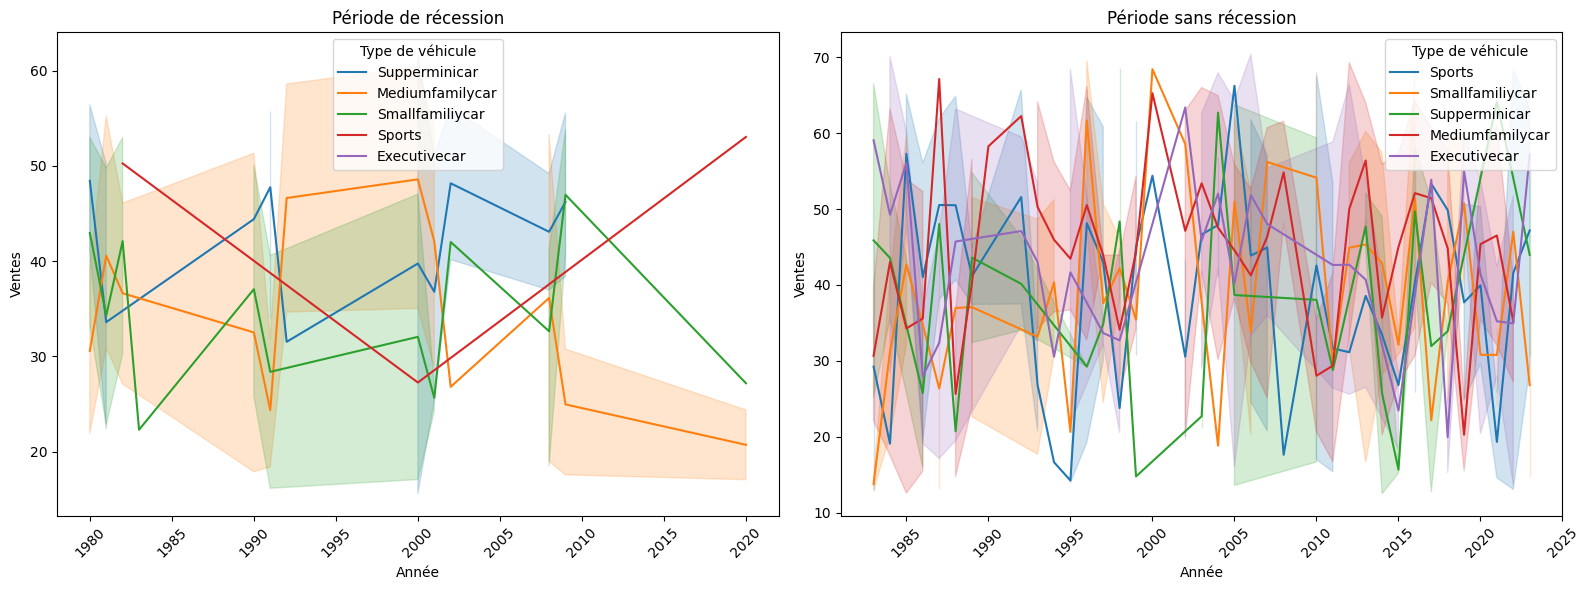

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Diviser les données en deux ensembles : récession et non récession
recession_data = df[df['Recession'] == 1]
non_recession_data = df[df['Recession'] == 0]

# Créer des graphiques linéaires séparés pour chaque période
plt.figure(figsize=(16, 6))

# Graphique pour la période de récession
plt.subplot(1, 2, 1)
sns.lineplot(x='Year', y='GDP', hue='Vehicle_Type', data=recession_data)
plt.title('Période de récession')
plt.xlabel('Année')
plt.ylabel('Ventes')
plt.xticks(rotation=45)
plt.legend(title='Type de véhicule')

# Graphique pour la période sans récession
plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='GDP', hue='Vehicle_Type', data=non_recession_data)
plt.title('Période sans récession')
plt.xlabel('Année')
plt.ylabel('Ventes')
plt.xticks(rotation=45)
plt.legend(title='Type de véhicule')

plt.tight_layout()
plt.show()


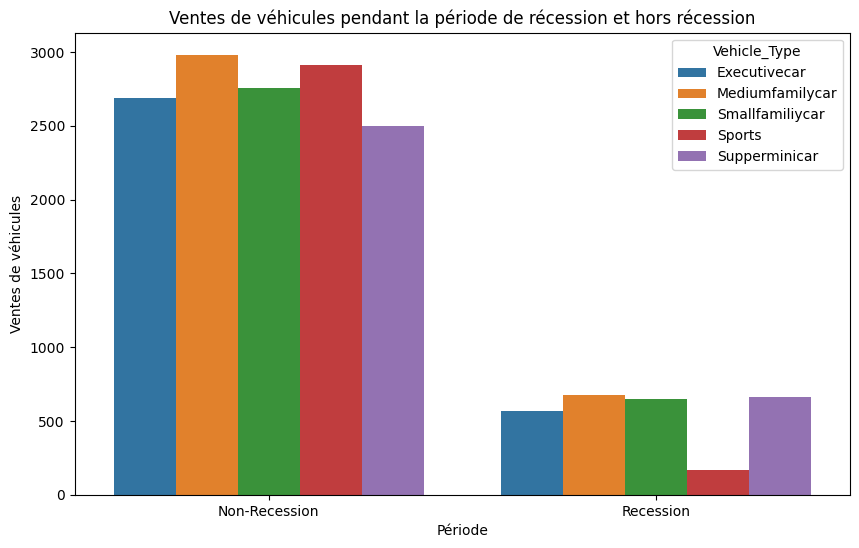

In [46]:
recession_data = df[df['Recession'] == 1]

dd=df.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

# Create the grouped bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=dd)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Période')
plt.ylabel('Ventes de véhicules')
plt.title('Ventes de véhicules pendant la période de récession et hors récession')
plt.show()

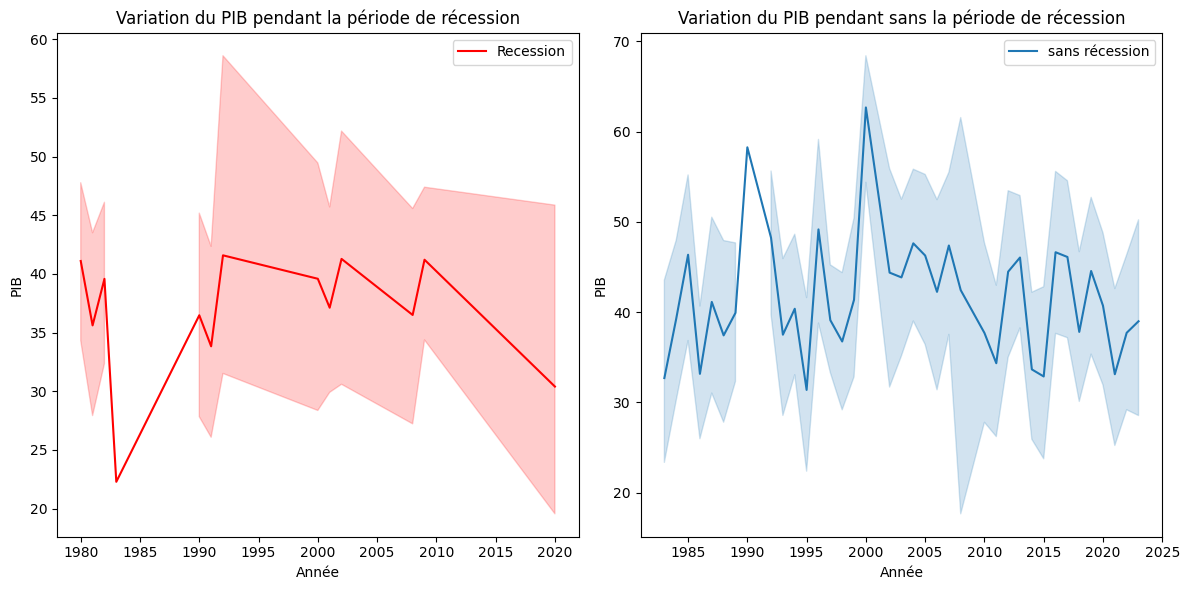

In [51]:
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

#Figure
fig=plt.figure(figsize=(12, 6))

#Create different axes for subploting
ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1,2 ,2) # add subplot 2 (1 row, 2 columns, second plot). 
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0 , color='red')
ax0.set_xlabel('Année')
ax0.set_ylabel('PIB')
ax0.set_title('Variation du PIB pendant la période de récession')

#plt.subplot(1, 2, 2)
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='sans récession',ax=ax1)
ax1.set_xlabel('Année')
ax1.set_ylabel('PIB')
ax1.set_title('Variation du PIB pendant sans la période de récession')
plt.tight_layout()
plt.show()

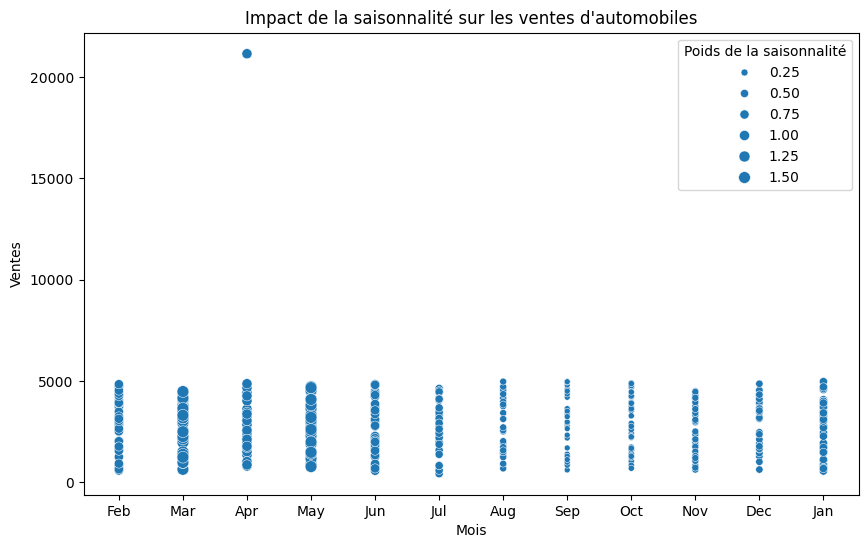

In [59]:
non_rec_data = df[df['Recession'] == 0]

size=non_rec_data['Seasonality_Weight'] #for bubble effect
plt.figure(figsize=(10, 6))
sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size)
plt.xlabel('Mois')
plt.ylabel('Ventes')
plt.title('Impact de la saisonnalité sur les ventes d\'automobiles')
plt.legend(title='Poids de la saisonnalité')
plt.show()

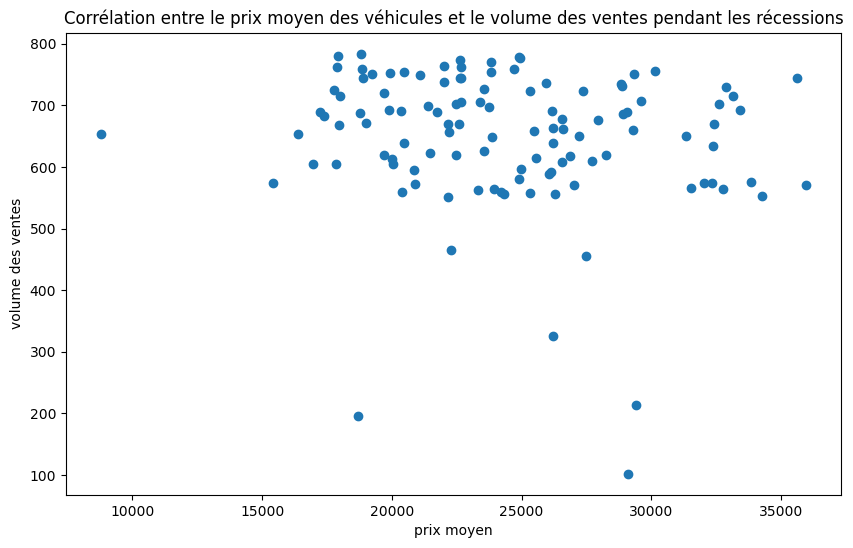

In [62]:
rec_data = df[df['Recession'] == 1]
plt.figure(figsize=(10, 6))
plt.scatter(recession_data['Price'], rec_data['Automobile_Sales'])
plt.xlabel('prix moyen')
plt.ylabel('volume des ventes')
plt.title('Corrélation entre le prix moyen des véhicules et le volume des ventes pendant les récessions')
plt.show()

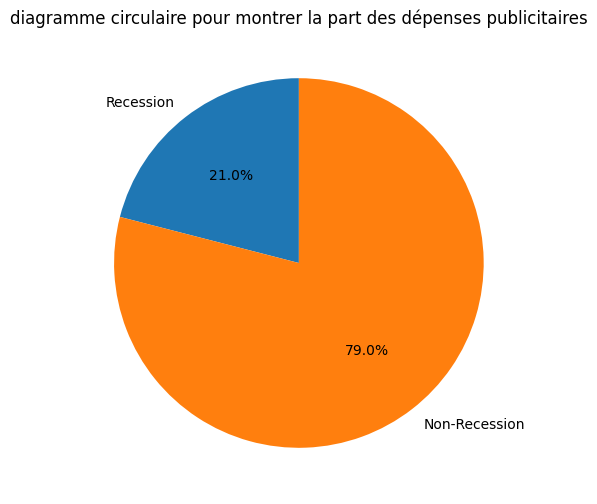

In [66]:
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]

RAtotal = Rdata['Advertising_Expenditure'].sum()
NRtotal = NRdata['Advertising_Expenditure'].sum()

# Create a pie chart for the advertising expenditure 
plt.figure(figsize=(8, 6))

labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('diagramme circulaire pour montrer la part des dépenses publicitaires')

plt.show()

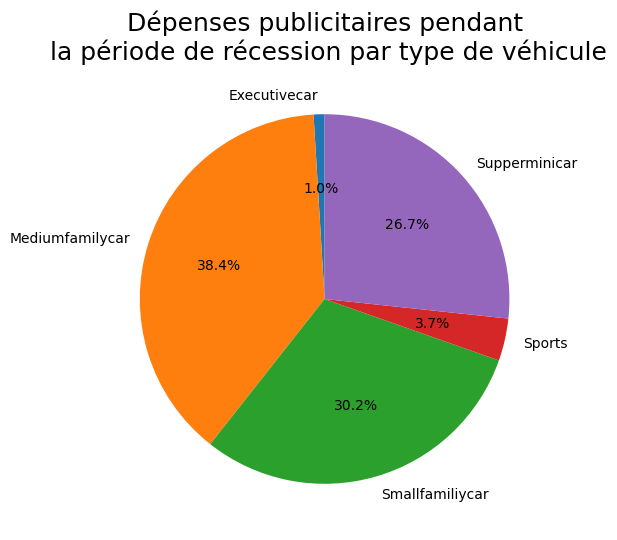

In [69]:
# Filter the data 
Rdata = df[df['Recession'] == 1]

VTexpenditure = Rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

plt.figure(figsize=(10, 6))

labels = VTexpenditure.index
sizes = VTexpenditure.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title(label="Dépenses publicitaires pendant\n la période de récession par type de véhicule",fontsize=18)

plt.show()

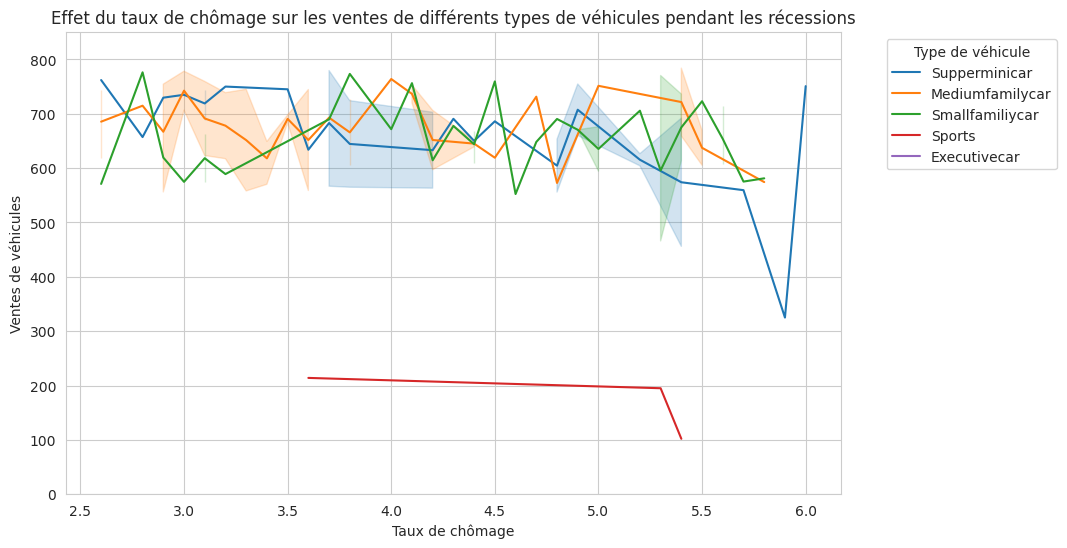

In [76]:
# Sélectionnez les données pendant les périodes de récession
df_rec = df[df['Recession'] == 1]

# Utilisez un style de base de seaborn
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales', hue='Vehicle_Type')
plt.ylim(0, 850)
# Ajoutez un titre et une légende
plt.title("Effet du taux de chômage sur les ventes de différents types de véhicules pendant les récessions")
plt.xlabel("Taux de chômage")
plt.ylabel("Ventes de véhicules")
plt.legend(title='Type de véhicule', bbox_to_anchor=(1.05, 1), loc='upper left')

# Affichez le graphique
plt.show()

In [83]:
import dash
import dash_core_components as dcc
import dash_html_components as html

# Initialiser l'application Dash
app = dash.Dash(__name__)

# Définir le contenu de l'application
app.layout = html.Div(children=[
    html.H1(children='Analyse des ventes d\'automobiles pendant les récessions'),

    html.Div(children='''
        Cette application Dash analyse l'impact des récessions sur les ventes d'automobiles.
    '''),

    # Ajouter d'autres composants Dash ici...
])

# Lancer l'application
if __name__ == '__main__':
    app.run(debug=True)
    

<class 'RuntimeError'>: can't start new thread